우리가 실생활에서 이용하는 정보들은 자연에 있는 것들을 가져온 것들이다. 우리가 그러한 정보를 이용하려면 일련의 과정을 필요로 한다.
1.자연에 있는 무언가를 인식하고 (perception)
2.그것을 처리해서 (Science, Engeneering)
3.환경에 적용하는 것이다. (application)
즉, 우리가 데이터를 다루기 위해서는 우선 데이터를 먼저 파악할 수 있어야 한다. 이 때 사용하는 도구들은 대표적으로 확률, 통계, 선형대수가 있다. 이번 시간에는 이 도구들에 대해 알아보도록 한다.

1.통계
통계라는 것은 사회집단에서의 상황을 숫자로 표현한 것이다. 즉, 통계라는 것은 과거에 있었던 일들 중, 우리가 원하는 값들(데이터)을 선별해낸 것이라고 볼 수 있다. 그런데, 선별해낸 데이터들 그 자체만으로는 큰 의미가 없다. 이 데이터들을 구별할 수 있는 특징점(대푯값)을 필요로 한다. 이러한 대푯값들을 정하는 데에도 여러 도구들이 있다.

a.중심값
중심값은 데이터들을 특정한 기준을 통해 정렬을 하고, 그 기준에 맞는 중간에 있는 값을 표현한 것이다. 중심값을 정하는 기준에는 주로, 평균과 중앙값, 최빈값이 있다.
평균(average)은 전체 데이터들에 대해 고르게 만든 값이다. 가장 많이 이용되는 수단이기도 하다.μ(뮤)라고도 표기한다.
중앙값(median)은 전체 데이터들을 정렬해서 그 중간에 있는 값을 선택한 것이다.
최빈값(mode)는 전체 데이터에서 가장 많은 빈도로 나타나는 값이다.
이러한 기준들은 데이터의 중심적 경향에 대해 설명한다. 그렇지만, 데이터 내의 변화에 대해선 고려하지 않는다. 그러나 자연에 있는 데이터에는 이전의 데이터와 상관관계가 있는 것들이 많기 때문에, 값에 변화에 대해 다른 값에 영향을 어떻게 미치는지도 파악할 척도도 필요로 한다. 그러한 척도를 변화값이라고 한다.

In [9]:
import numpy as np
import statistics as st
from collections import Counter

data = [1,2,3,4,2]
print("This is avg : " +  str(np.mean(np.array(data))))
print("This is median : " + str(st.median(data)))
cnt = Counter(data)
mode = cnt.most_common(1)
print("This is mode : " + str(mode[0][0]))

This is avg : 2.4
This is median : 2
This is mode : 2


b.변홧값
변홧값에는 분산과 표준편차, 박스플롯이 있다.
분산(variance)은 어떤 값으로부터 변화정도를 나타낸다. 즉 얼만큼 퍼져있는지를 나타낸다.V 혹은 σ^2로도 표기한다.
표준편차(standard deviation) 표준편차 또한 어떤 값으로부터의 변화 정도를 나타낸다. 분산의 제곱근이므로, σ로도 표기되기도 하고, 약자로 std라고 하기도 한다.
박스플롯은 자료의 특성을 요약하는 그래프이다. 데이터셋의 median에서 가장 작은 값을 Q1, 가장 큰 값을 Q3이라 한다. Q1~Q3의 범위를 IQR이라 하며, Q1 - 1.5 * IQR을 최솟값으로 해서 그 아래 값들은 outlier라고 하여 버리고, Q3 + 1.5 * IQR은 최댓값으로 해서 그 윗 값들도 outlier라고 하여 버린다. Q2는 데이터셋의 median이다.

Thi is var : 1.04
This is std : 1.019803902718557
This is box plot : 


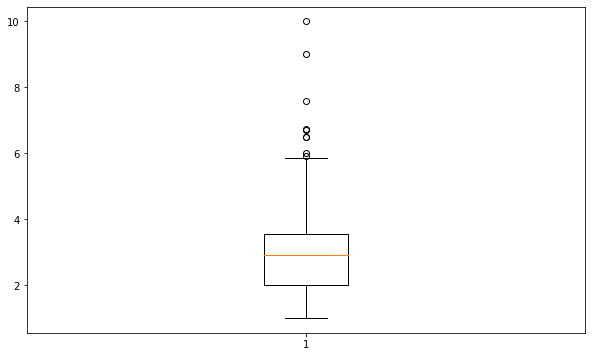

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 6]

print("Thi is var : " + str(np.var(data)))
print("This is std : " + str(np.std(data)))

tips = sns.load_dataset('tips')

tips.groupby(['sex', 'day']).size()
plt.boxplot(tips['tip'])

print("This is box plot : " )

plt.show()


# 출처: https://rfriend.tistory.com/410 [R, Python 분석과 프로그래밍의 친구 (by R Friend)]

2.확률
확률은 전체 사건에서 특정한 사건의 수를 기반으로 나타낸 특정 사건이 일어날 기대수치이다. 확률은 항상 0보다 크고 1보다 작다. 이러한 확률은 Real World에서 데이터를 샘플링 후 Real World를 설명할 때 사용한다. 이 때 사용하는 게, 확률분포와 기하분포이다.
확률분포(probability distribution)는 사건에 대해 기록해서 전체 event 대비 일어난 횟수를 파악해서 각 event당 확률을 계산하는 것이다. (즉, 모든 사건을 경험할 필요는 없다) 특정 종류의 data의 경우 확률 계산 방법을 패턴화할 수 있다.
기하분포(geometric distribution)는 일련의 사건들에 대해 독립시행을 실시한다. 각 시행은 성공 혹은 실패인데, 각 시행마다 성공할 확률은 항상 같다. (즉, 사건들에 대해 영향을 미치지 않는다.) 성공할 때까지 시행을 반복한다. P(X = r) = P * (1-P)^(r-1) 혹은, X~Geo(P)로도 나타낸다. 여기서 r은 r번만에 성공할 확률이다. 

확률분포에는 대표적인 것들이 여러개 있다. Event종류와 관심 대상에 따라 유형화 해 놓은 공식들이 존재하는데, 대표적으로
이산분포(Discrete Distributions)는 Event space가 유한할 때 사용한다.
연속분포(Continuous Distribution), 그 중에서도 정규분포(Noraml Distribution, Gaussian Distribution)는 우리가 일상에서 겪을 수 있는 거의 모든 것에 대한 확률을 나타낼 수 있으므로 정말 중요한 분포이다. Mixture of Gaussian이라고 전체에 대한 것을 Guassain하게 fit해서 3개로 나타낼 수도 있다.

일반적인 확률은 통계를 기반으로 해서 계산한다. 그러나, 통계 없이 현재 상황만으로도 확률을 계산할 수도 있다. 이를 사전확률(prior probability)이라 하며, 전체 사건에서 관심 사건의 비율로 그 확률을 가진다. 사전확률이 더 정확한 결과를 가질 때가 있다. 이유는 통계 정보가 항상 정확한 것은 아니기 때문이다. 예를 들어, 천동설, 지구평면설 등의 모델은 실질적, 과학적인 증거가 없어서 좋은 모델이라고 할 수 없다. 이처럼, 모델링을 할 때는 정확한 근거를 필요로 한다.

※P(AnB) => A와 B가 동시에 발생 P(A|B) => B가 벌어진 상태에서 A가 벌어질 확률
P(AnB) = P(A) * P(B) => 독립한 사건(서로 영향x), P(AnB) != P(A) * P(B) => 종속사건(서로 영향O)

This is Gaussian dist : 


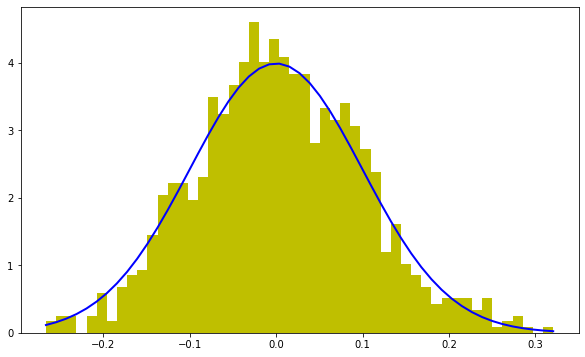

In [17]:
muy, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(muy, sigma, 1000)

count, bins, ignored = plt.hist(s, 50, density=True, color='y')
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - muy)**2 / (2 * sigma**2) ),
         linewidth=2, color='b')
print("This is Gaussian dist : ")
plt.show()

# 출처 : https://m.blog.naver.com/PostView.nhn?blogId=roboholic84&logNo=221629176069&proxyReferer=https:%2F%2Fwww.google.com%2F

기술할 각 주제에 대해서 반드시 아래 항목이 들어가야 함
왜 이 주제가 중요한지?
우리 일상생활에 어떻게 적용되는지?
활용가능한 주요 알고리즘의 이름, 패키지 명
해당 알고리즘 혹은 주제의 핵심 아이디어(수식 같은 거라던지)